### Missing Values - Feature Engineeing.

Lifecycle of a Data Science Projects

1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN
6. Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?
1. ##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 1.Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [6]:
import numpy as np
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
df['Cabin_null'].mean()

0.7710437710437711

In [8]:
df.Cabin_null.head()

0    1
1    0
2    1
3    0
4    1
Name: Cabin_null, dtype: int32

In [10]:
# from the suvived person and unsurvied person how many cabin data is null
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# All the technique for handling missing values.
1. mean/median/mode replacement.
2. Random Sample Imputation.
3. Capturing NAN value with a new feature.
4. End of distribution imputation.
5. Arbitory imputation 
6. Frequency  categoies  imputation.


# mean/median/mode imputation.
Q. When should we apply?
mean/median mode  imputation  has a assumption that the data are missing Compeletly at random (MCAR).
solve this by replacing the NAN value with  most frequent occurance  of the variables.


In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
def impute_nan(df,var,median):
    df[var+'_median'] = df[var].fillna(median)

In [7]:
median = df.Age.median()
median

28.0

In [9]:
impute_nan(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [10]:
print(df['Age'].std(),df['Age_median'].std())

14.526497332334042 13.019696550973201


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

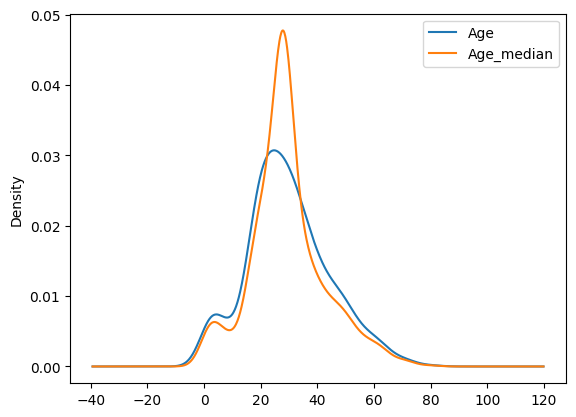

In [12]:
fig = plt.figure()
ax = fig.add_axes(111)
df['Age'].plot(kind='kde',ax = ax)
df.Age_median.plot(kind='kde',ax=ax)
lines, label = ax.get_legend_handles_labels()
ax.legend(lines,label,loc='best')

### Advantages and Disadvantages of mean/median/mode imputation.

###### Advantages
1. Easy to impliment(robust to outlier).
2. Faster way to obtain the complete dataset.

###### Disadvantages.
1. Change and distortion in the original variance.
2. it impacts correlation.